## one-hot encoding 이상값 처리 그리고 시각화

In [12]:
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

* 타겟 데이터
 * 1990년 캘리포니아의 각 행정 구역 내 주택 가격의 중앙값

* 특징 데이터 
 - MedInc : 행정 구역 내 소득의 중앙값
 - HouseAge : 행정 구역 내 주택 연식의 중앙값
 - AveRooms : 평균 방 갯수
 - AveBedrms : 평균 침실 갯수
 - Population : 행정 구역 내 인구 수
 - AveOccup : 평균 자가 비율
 - Latitude : 해당 행정 구역의 위도
 - Longitude : 해당 행정 구역의 경도

In [4]:
import pandas as pd
import numpy as np
df = pd.DataFrame(california.data, columns=california.feature_names)
df_target = pd.DataFrame(california.target, columns=["Target"])
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


* 캘리포니아 주택가격 중앙값에서 우리는 저렴한 편의 주택, 중간 주택, 비싼 가격의 주택의 전체적인 특성에 대해서 알고싶다. 현재는 numeric 변수로 이루어져 있기에 이를 분석하기가 쉽지 않다. 

* 중앙값을 카테고리 변수로 만든 후에 one-hot-인코딩을 만드는 메서드를 생성하라.

In [9]:
def make_onehot(df, target, bins, labels):
    
    #bins에 포함되지 않은 데이터 삭제(이상치 처리)
    drop_list1 = list(np.where((target<bins[0]))[0])
    drop_list2 = list(np.where((target>bins[-1]))[0])
    
    drop_list = drop_list1 + drop_list2
    
    df = df.drop(drop_list, axis = 0)
    target = target.drop(drop_list,axis = 0)
    
    # 타겟 정리
    target = pd.DataFrame(target)
    
    # labels 새로운 컬럼 생성
    
    # enumerate 이용하면 labels 원소, 원소 순서 모두 이용 가능-> 앞선 변수가 순서, 뒤에 오는 변수가 원소를 의미
    for i,j in enumerate(labels):
        if(i<len(labels)):
            bool_list = (target>bins[i]) & (target<=bins[i+1])
            df[j] = bool_list*1
    output = df

    return output


In [10]:
bins = [0.2, 1.7, 2.5, 5]
labels = ["level_1", "level_2", "level_3"]
data = make_onehot(df, target = df_target, bins= bins, labels=labels)
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,level_1,level_2,level_3
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,0,0,1
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,0,0,1
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,0,0,1
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,0,0,1
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,1,0,0
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,1,0,0
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,1,0,0
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,1,0,0


In [7]:
import matplotlib.pyplot as plt

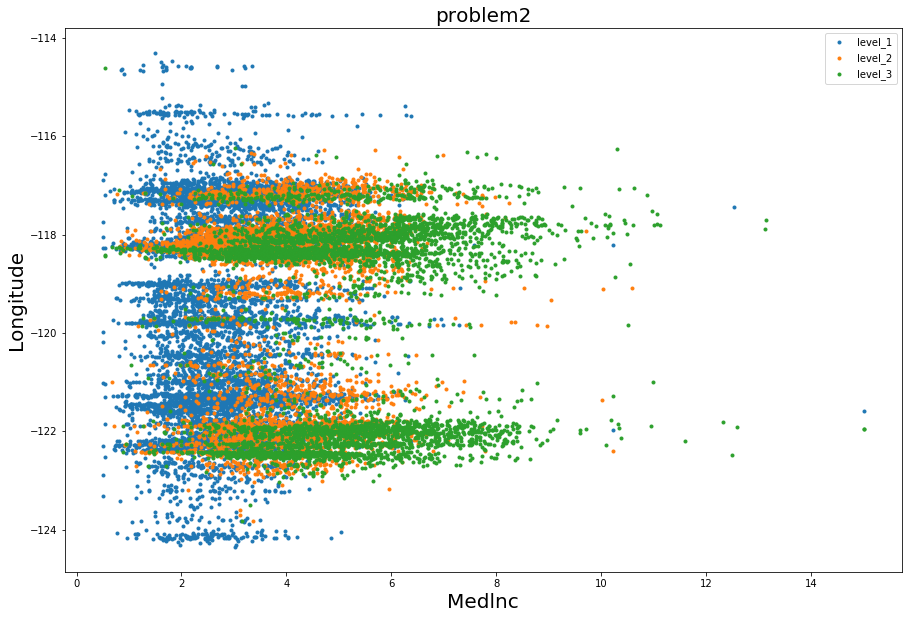

In [19]:
fig, ax = plt.subplots(figsize=(15,10))

for name in labels:
    plot_data = data[data[name]==1]
    ax.plot(plot_data.MedInc,
           plot_data.Longitude,
           marker='.',
           linestyle='',
           label=name)
ax.legend(fontsize=10, loc='upper right')
plt.title('problem2', fontsize=20)
plt.xlabel('Medlnc',fontsize=20)
plt.ylabel('Longitude',fontsize=20)
plt.show()

In [22]:
data['HouseAge'].describe()

count    19670.000000
mean        28.385257
std         12.508732
min          1.000000
25%         18.000000
50%         28.000000
75%         37.000000
max         52.000000
Name: HouseAge, dtype: float64